# Exercise 5
## Sheep Dominance

The dataset is a graph of the wins and losses from confrontations within a group of 28 female bighorn sheep in the National Bison Range in 1984. The weight refers to the number of times the sheep won a display of dominance.

Our goal is to try to view the network in such as way as to make conclusions about the dominance patterns.

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

%matplotlib inline

## Load the data from the graphml file
This already includes the nodes, edges, weights, and attributes.

In [2]:
net = nx.read_graphml("data/sheep_ml.graphml")

# EDA
Let's take a look at just the raw data. There are only 28 sheep so we can calculate the total weight (dominance) for each sheep. 

In [3]:
adjacent_mat = net.adj
total_weight = np.zeros(len(net.nodes))
ages =  np.zeros(len(net.nodes))

for idx in range(len(net.nodes)):
    
    ages[idx] = net.node['{}'.format(idx + 1)]['age']
    
    for key, value in adjacent_mat['{}'.format(idx + 1)].items():
        
        total_weight[idx] += value['weight']
        

## Degree of connectedness

Here we use networkx to show us the number of connections for each sheep.

In [4]:
deg = nx.degree(net)
degrees = np.zeros(len(net.nodes))
idx = 0
for n in net:
    print("ID = {}, Degree = {}, Total weight = {}, Average weight = {:.3f}, {}".format(n, 
                                                                                    deg[n], 
                                                                                    total_weight[int(n)-1], 
                                                                                    total_weight[int(n)-1] / deg[n], net.node[n]))
    degrees[idx] = deg[n]
    idx += 1

ID = 1, Degree = 5, Total weight = 5.0, Average weight = 1.000, {'age': 8}
ID = 2, Degree = 19, Total weight = 35.0, Average weight = 1.842, {'age': 8}
ID = 3, Degree = 26, Total weight = 63.0, Average weight = 2.423, {'age': 4}
ID = 4, Degree = 26, Total weight = 25.0, Average weight = 0.962, {'age': 7}
ID = 5, Degree = 7, Total weight = 2.0, Average weight = 0.286, {'age': 8}
ID = 6, Degree = 19, Total weight = 0.0, Average weight = 0.000, {'age': 3}
ID = 7, Degree = 17, Total weight = 43.0, Average weight = 2.529, {'age': 5}
ID = 8, Degree = 18, Total weight = 56.0, Average weight = 3.111, {'age': 4}
ID = 9, Degree = 22, Total weight = 52.0, Average weight = 2.364, {'age': 7}
ID = 10, Degree = 4, Total weight = 3.0, Average weight = 0.750, {'age': 9}
ID = 11, Degree = 16, Total weight = 14.0, Average weight = 0.875, {'age': 6}
ID = 12, Degree = 11, Total weight = 13.0, Average weight = 1.182, {'age': 4}
ID = 13, Degree = 21, Total weight = 30.0, Average weight = 1.429, {'age': 9}
ID

# Scatter plots

Let's just make some scatter plots to see if there are obvious patterns to age, weight, and connectedness.

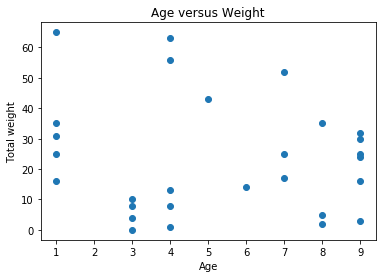

In [5]:
plt.scatter(ages, total_weight);
plt.xlabel("Age");
plt.ylabel("Total weight")
plt.title("Age versus Weight");

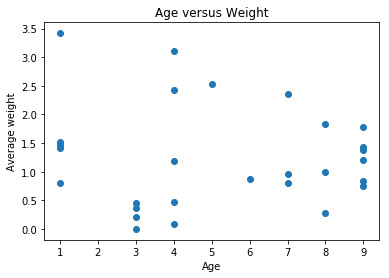

In [6]:
plt.scatter(ages, total_weight / degrees);
plt.xlabel("Age");
plt.ylabel("Average weight")
plt.title("Age versus Weight");

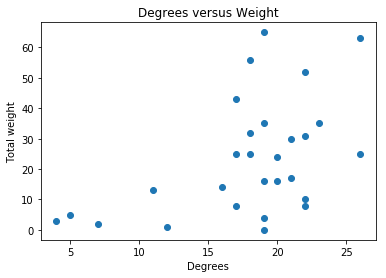

In [7]:
plt.scatter(degrees, total_weight);
plt.xlabel("Degrees");
plt.ylabel("Total weight")
plt.title("Degrees versus Weight");

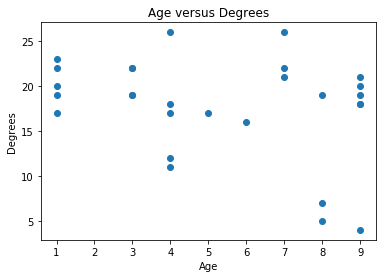

In [8]:
plt.scatter(ages, degrees);
plt.xlabel("Age");
plt.ylabel("Degrees")
plt.title("Age versus Degrees");

## There doesn't appear to be an obvious pattern to the scatter plots
## Let's use networkx to plot some network graphs.

The label is the sheep ID. The size of the node is the proportional to the age of the sheep. For force-directed graphs, the length of the edge is inversely proportional to the weight of the dominance.

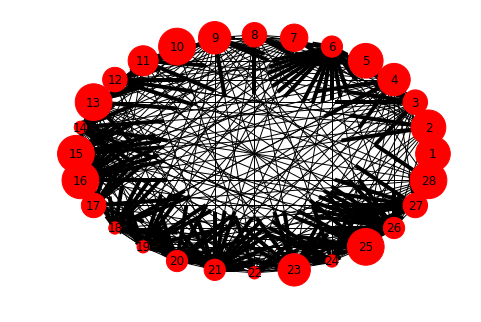

In [9]:
nx.draw_circular(net, with_labels=True, node_size=ages*150.0)

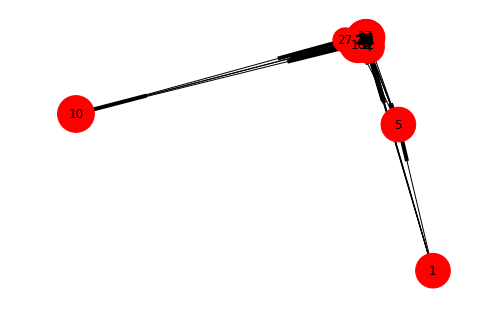

In [10]:
nx.draw_spectral(net, with_labels=True, node_size=ages*150.0)

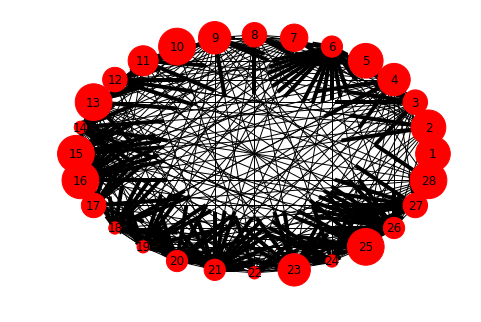

In [11]:
nx.draw_shell(net, with_labels=True, node_size=ages*150.0)

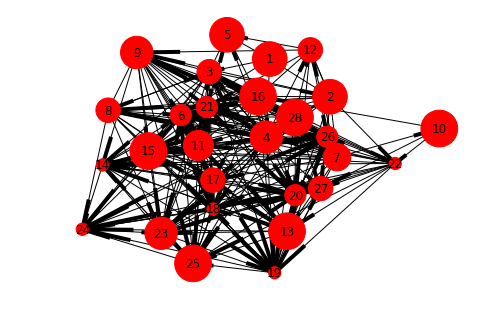

In [12]:
nx.draw_kamada_kawai(net,with_labels=True, node_size=ages*150.0)

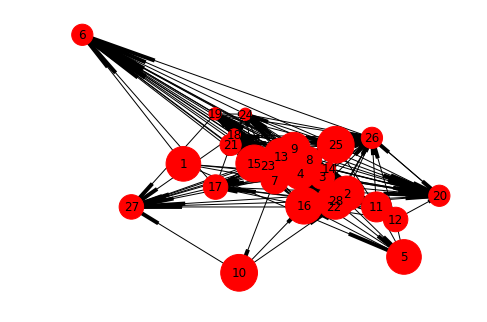

In [13]:
nx.draw(net,with_labels=True, node_size=ages*150.0)

## Interactive Bokeh plot of the graph

In [14]:
from bokeh.io import show, output_file
from bokeh.models import Plot, Range1d, MultiLine, Circle, HoverTool, TapTool, BoxSelectTool
from bokeh.models.graphs import from_networkx, NodesAndLinkedEdges, EdgesAndLinkedNodes
from bokeh.palettes import Spectral4


In [15]:
plot = Plot(plot_width=800, plot_height=800,
            x_range=Range1d(-1.1,1.1), y_range=Range1d(-1.1,1.1))
plot.title.text = "Sheep Interactive Network Graph"

plot.add_tools(HoverTool(tooltips=None), TapTool(), BoxSelectTool())

graph_renderer = from_networkx(net, nx.kamada_kawai_layout, scale=1, center=(0,0))

graph_renderer.node_renderer.glyph = Circle(size=15, fill_color=Spectral4[0])
graph_renderer.node_renderer.selection_glyph = Circle(size=15, fill_color=Spectral4[2])
graph_renderer.node_renderer.hover_glyph = Circle(size=15, fill_color=Spectral4[1])

graph_renderer.edge_renderer.glyph = MultiLine(line_color="#CCCCCC", line_alpha=0.8, line_width=5)
graph_renderer.edge_renderer.selection_glyph = MultiLine(line_color=Spectral4[2], line_width=5)
graph_renderer.edge_renderer.hover_glyph = MultiLine(line_color=Spectral4[1], line_width=5)


graph_renderer.selection_policy = NodesAndLinkedEdges()
graph_renderer.inspection_policy = EdgesAndLinkedNodes()

plot.renderers.append(graph_renderer)

output_file("bokeh_interactive.html")
show(plot)

## Save the graph as a json file again so that we can plot it in D3

In [16]:
# Convert the node IDs from strings to integers for use in D3 script
net_int = nx.convert_node_labels_to_integers(net, first_label=0, ordering='default', label_attribute=None)

In [17]:
from networkx.readwrite import json_graph
import json
data = json_graph.node_link_data(net_int)
with open('graph.json', 'w') as f:
    json.dump(data, f, indent=4)

## Now open a webserver and the index.html file for the D3 force-directed plot